# 1. 问题描述


本次作业中，将选择1个数据集进行频繁模式和关联规则挖掘。
github仓库地址为https://github.com/bless0724/datamining2.git

# 2.数据集


选择的数据集为Wine Reviews

# 3.数据分析

## 对数据进行处理，转换成适合进行关联规则挖掘的形式。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

读取数据，选择存在关联规则的属性。我选择了country，Points，Price，variety，Winery5个属性,之所以不考虑province，region1,region2和country的关系是确定的，计算出置信度为1意义不大。
查看它们是否存在缺失值，若存在，直接去除。

In [8]:
winemag = pd.read_csv("winemag-data_first150k.csv",delimiter=',',low_memory=False)
rel_attr = winemag[['country','points','price','variety','winery']]
print("缺失值个数为：\n", rel_attr.isnull().sum())
rel_attr = rel_attr.dropna().astype(str)
print("去除后缺失值个数为：\n", rel_attr.isnull().sum())
rel_attr

缺失值个数为：
 country        5
points         0
price      13695
variety        0
winery         0
dtype: int64
去除后缺失值个数为：
 country    0
points     0
price      0
variety    0
winery     0
dtype: int64


,country,points,price,variety,winery
0,US,96,235.0,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,Sauvignon Blanc,Macauley
3,US,96,65.0,Pinot Noir,Ponzi
4,France,95,66.0,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...
150925,Italy,91,20.0,White Blend,Feudi di San Gregorio
150926,France,91,27.0,Champagne Blend,H.Germain
150927,Italy,91,20.0,White Blend,Terredora
150928,France,90,52.0,Champagne Blend,Gosset


对处理过的数据集rel_attr进行one-hot编码，对编码后得到的DataFrame进行展示，其含义为每一个样本中是否出现某一属性，表中的值为bool类型。

In [9]:
rel_attr_arr = rel_attr.stack().groupby(level=0).apply(list).tolist()
te = TransactionEncoder()
te_ary = te.fit(rel_attr_arr).transform(rel_attr_arr)
rel_attr_te = pd.DataFrame(te_ary, columns = te.columns_)
rel_attr_te

,1+1=3,10 Knots,10.0,100,100.0,1000 Stories,1000.0,101.0,102.0,103.0,...,Ébano,Écluse,Élevée Winegrowers,Éric & Jöel Durand,Ñandú,Único Luis Miguel,àMaurice,áster,Štoka,Žilavka
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137225,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137226,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137228,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 找出频繁模式


用apriori方法求频繁项集，设置最小支持度min_support=0.005。

In [41]:
Freq_items = apriori(rel_attr_te, min_support = 0.005, use_colnames=True)
#Freq_items['length'] = Freq_items['itemsets'].apply(lambda x: len(x))

展示支持度大于0.005的频繁项，可以发现一共有329项。

In [42]:
Freq_items

,support,itemsets
0,0.038293,(10.0)
1,0.022692,(11.0)
2,0.036071,(12.0)
3,0.032639,(13.0)
4,0.028266,(14.0)
...,...,...
324,0.008562,"(90, Pinot Noir, US)"
325,0.006114,"(91, Pinot Noir, US)"
326,0.006580,"(Cabernet Sauvignon, 92, US)"
327,0.006872,"(92, Pinot Noir, US)"


## 导出关联规则，计算其支持度和置信度

找出关联规则，指标设定为置信度大于0.5，下表中support是支持度，confidence是置信度。
可以发现最大置信度的关联规则达到了0.828510。

In [46]:
asso_rule = association_rules(Freq_items,metric='confidence',min_threshold=0.5)
asso_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22.0),(US),0.027130,0.452809,0.014049,0.517862,1.143665,0.001765,1.134926
1,(24.0),(US),0.025089,0.452809,0.014173,0.564914,1.247577,0.002813,1.257662
2,(25.0),(US),0.043394,0.452809,0.023435,0.540050,1.192667,0.003786,1.189676
3,(26.0),(US),0.012869,0.452809,0.006996,0.543601,1.200509,0.001168,1.198932
4,(28.0),(US),0.024426,0.452809,0.017044,0.697792,1.541030,0.005984,1.810645
...,...,...,...,...,...,...,...,...,...
66,"(90, Pinot Noir)",(US),0.011295,0.452809,0.008562,0.758065,1.674137,0.003448,2.261722
67,"(91, Pinot Noir)",(US),0.007739,0.452809,0.006114,0.790019,1.744706,0.002610,2.605904
68,"(Cabernet Sauvignon, 92)",(US),0.007345,0.452809,0.006580,0.895833,1.978391,0.003254,5.253032
69,"(92, Pinot Noir)",(US),0.008198,0.452809,0.006872,0.838222,1.851160,0.003160,3.382361


## 对规则进行评价


实际上mlxtend中给出了3种评价指标，分别是lift，leverage和conviction，见上表。
lift：规则提升度，表示含有先导项条件下同时含有后继项的概率，与后继项总体发生的概率之比。
leverage：规则杠杆率，表示当先导项与后继项独立分布时，先导项与后继项一起出现的次数比预期多多少。
conviction：规则确信度，与提升度类似，但用差值表示。
这三个值都是越大关联度越强。


## 可视化展示

用散点图对支持度大于0.005，置信度大于0.5的关联规则进行可视化展示。

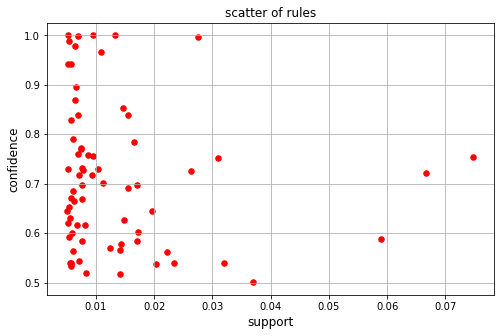

In [49]:
asso_rule.plot(kind="scatter",x="support",c="r",y="confidence",s=30,figsize=(8,5))
plt.grid("on")
plt.xlabel("support", size=12)
plt.ylabel("confidence", size=12)
plt.title("scatter of rules")
plt.show()

## 挖掘结果分析

通过用散点图可视化可以看出，大部分的关联规则支持度都小于0.01，这是因为数据集中数据量很大，每一条数据的差异性也很大。大部分的关联规则都是价格与国家，分数与国家，这是因为这几种属性的频数相对较小，重复出现的概率更高。此外，没有置信度为1的数据，说明属性选择是较好的，排除了那些必定会发生的情况。